<a href="https://colab.research.google.com/github/SimonParadise/MPA-MLF-Buchta-228812/blob/main/Lab07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
###################################
# Write your own code here #
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Flatten
###################################
font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape, X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28) (10000, 28, 28)


In [3]:
def display_random_images(x_data: np.array, y_data: np.array, count: int = 10) -> None:
  index = np.array(len(x_data))
  selected_ind = np.random.choice(index, count)

  selected_img = x_data[selected_ind]
  selected_labels = y_data[selected_ind]
  concat_img = np.concatenate(selected_img, axis=1)

  plt.figure(figsize=(20,10))
  plt.imshow(concat_img, cmap="gray")

  for id_label, label in enumerate(selected_labels):
    plt.text(14 + 28*id_label, 28*(5/4), label)
  plt.axis('off')
  plt.show()

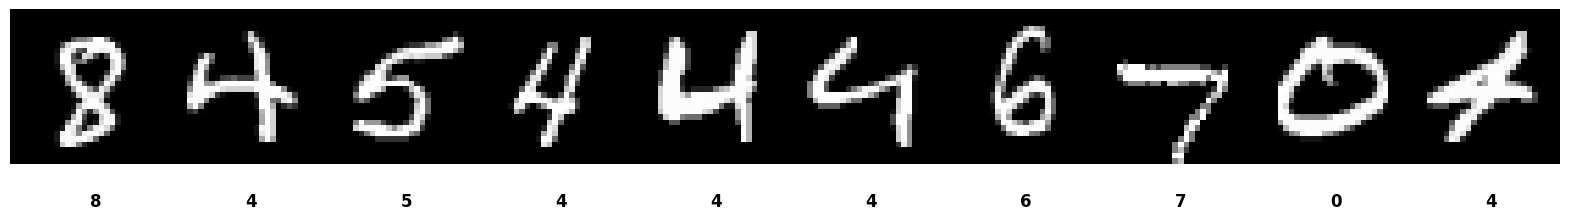

(28, 28)


In [4]:
display_random_images(X_train, y_train)

print(X_train[0].shape)

In [5]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [6]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [7]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [8]:
model = Sequential()
###################################
# Write your own code here #
# number of filters, kernel size 3x3  #
model.add(Conv2D(32, kernel_size=(3,3),activation='relu', input_shape=(28, 28, 1)))
# add maxpooling #
model.add(MaxPooling2D(pool_size=(2, 2)))
# faltten to one dimension #
model.add(Flatten())
# fully connected layer 128 neurons#
model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))
###################################

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
loss = None
optimizer = None
metrics = None
learning_rate = 0.01

###################################
# Write your own code here #

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

###################################
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         692,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test), verbose=2)

Epoch 1/10
469/469 - 32s - 69ms/step - accuracy: 0.9346 - loss: 0.2310 - val_accuracy: 0.9766 - val_loss: 0.0784
Epoch 2/10
469/469 - 38s - 81ms/step - accuracy: 0.9787 - loss: 0.0711 - val_accuracy: 0.9813 - val_loss: 0.0544
Epoch 3/10
469/469 - 41s - 87ms/step - accuracy: 0.9856 - loss: 0.0479 - val_accuracy: 0.9830 - val_loss: 0.0504
Epoch 4/10
469/469 - 27s - 58ms/step - accuracy: 0.9898 - loss: 0.0353 - val_accuracy: 0.9846 - val_loss: 0.0474
Epoch 5/10
469/469 - 42s - 90ms/step - accuracy: 0.9923 - loss: 0.0260 - val_accuracy: 0.9854 - val_loss: 0.0438
Epoch 6/10
469/469 - 40s - 85ms/step - accuracy: 0.9939 - loss: 0.0202 - val_accuracy: 0.9861 - val_loss: 0.0474
Epoch 7/10
469/469 - 41s - 87ms/step - accuracy: 0.9950 - loss: 0.0166 - val_accuracy: 0.9873 - val_loss: 0.0426
Epoch 8/10
469/469 - 41s - 87ms/step - accuracy: 0.9966 - loss: 0.0118 - val_accuracy: 0.9842 - val_loss: 0.0541
Epoch 9/10
469/469 - 27s - 57ms/step - accuracy: 0.9971 - loss: 0.0096 - val_accuracy: 0.9877 - 

In [12]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: {score[1]*100} %')

Test loss: 0.04695019870996475
Test accuracy: 98.72999787330627 %


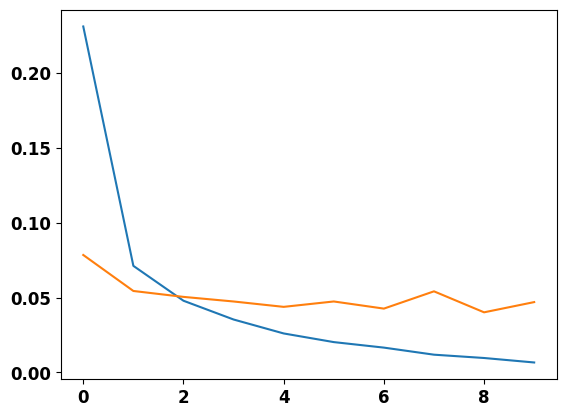

In [13]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

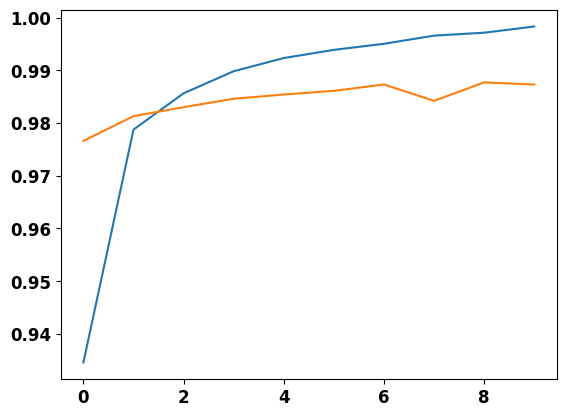

In [14]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


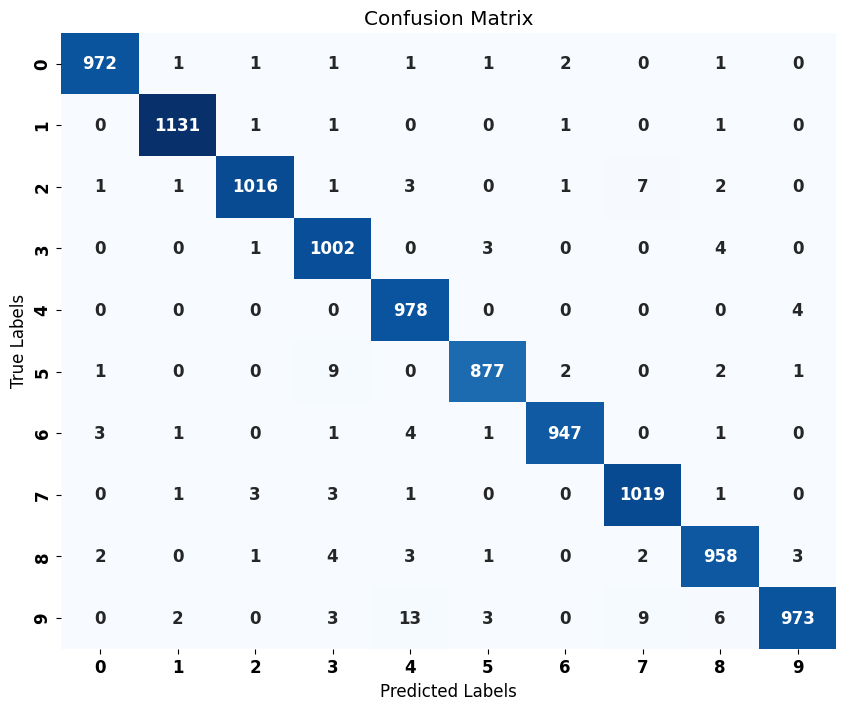

In [15]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

Ypred = model.predict(X_test)
Ypred_classes = np.argmax(Ypred, axis=1)

y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true,Ypred_classes)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, cbar=False)

# Adding labels and titles
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()